In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv("titanic_train.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


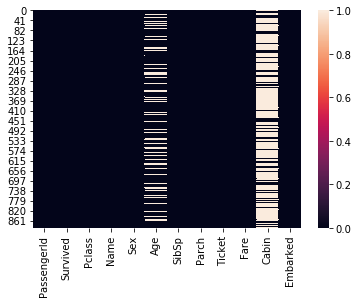

In [5]:
sns.heatmap(train.isnull())
#is.null() --> missing data

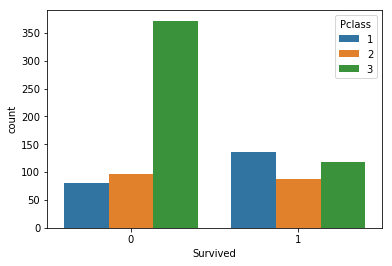

In [6]:
sns.countplot(x="Survived",hue='Pclass',data=train)

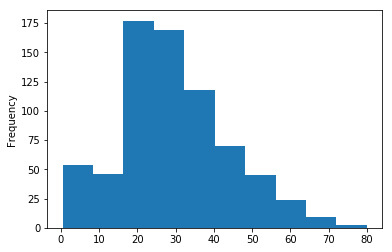

In [7]:
train['Age'].plot.hist()

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


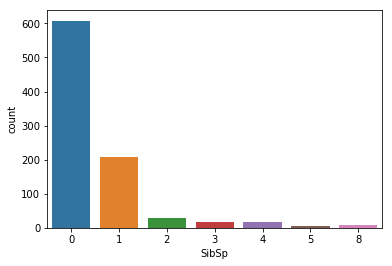

In [9]:
#sibSp= no.of Siblings
sns.countplot(x='SibSp', data = train)

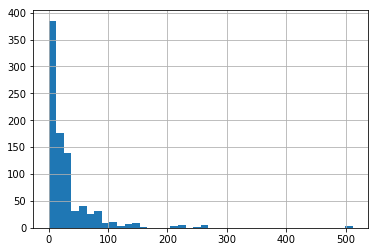

In [10]:
train['Fare'].hist(bins=40)

# Data Cleaning

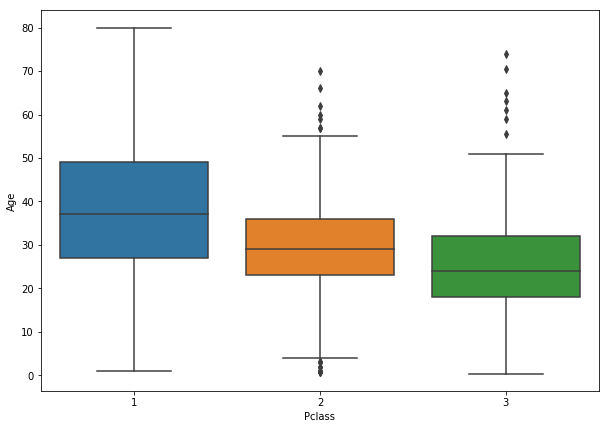

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y ='Age', data=train)

In [12]:
train["Age"].mean()

29.69911764705882

In [13]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

In [14]:
# axis=0 means 'along the row'
# axis=1 means 'along the column'
# axis=2 means 'along the depth'
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

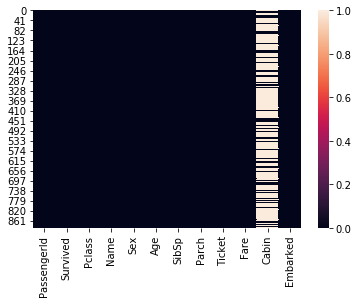

In [15]:
sns.heatmap(train.isnull())

In [16]:
train.drop('Cabin',axis=1,inplace=True)
#inplace=True should return None and
#make the change in the original object

In [17]:
train.dropna(inplace=True)

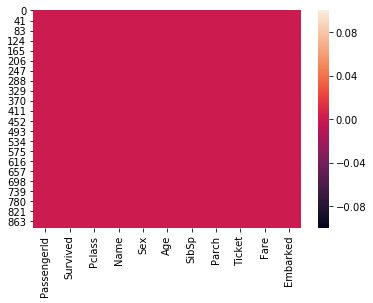

In [18]:
sns.heatmap(train.isnull())

In [ ]:
#Dummy variable hence assign on with 1 and other with 0
#but one can find later value with former : Mulit-colinearity
pd.get_dummies(train['Sex'])

In [25]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [23]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [24]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
train = pd.concat([train,sex,embark],axis=1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [33]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [38]:
train.tail()
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [36]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [56]:
X= train.drop(['Survived'],axis=1)
y= train['male']

In [57]:
from sklearn.cross_validation import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=101)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lm = LogisticRegression()

In [61]:
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
predictions = lm.predict(X_test)

# Classification 

In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test,predictions)

array([[ 88,   0],
       [  0, 179]])